# Day 12

## part 1

- Crops are arranged in different regions
- The price is the product of the area and perimiter of each region
- Find the total price

In [161]:
from dataclasses import dataclass
import logging

from matplotlib import pyplot as plt

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file, ParseConfig as PC, markdown, plot_grid, Point2 as P
)

log = logging.getLogger('day 12')
logging.basicConfig(level=logging.INFO)

INFO:advent_of_code_utils.py:10 items loaded from "day_12_example.txt"


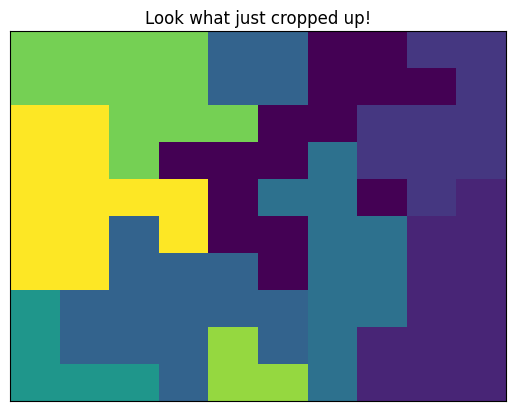

In [162]:
# let's get the example working first
parser = PC('\n', str)
grid = parse_from_file('day_12_example.txt', parser)

def plot_regions(grid: list[str], ax) -> None:
    """converts regions to a grid of numbers for easy plotting"""
    temp = [[ord(c) for c in line] for line in grid]
    plot_grid(temp, ax)

fig, ax = plt.subplots()
ax.set_title('Look what just cropped up!')
plot_regions(grid, ax)

In [163]:
@dataclass
class Region:
    crop: str
    tiles: list[P]

    def count_fences(self, graph: dict[P: list[P]]) -> int:
        """returns the number of fences required for the region"""
        total = 4 * len(self.tiles)
        for tile in self.tiles:
            total -= len(graph[tile])
        return total
    
    def get_cost(self, graph: dict[P: list[P]]) -> int:
        """returns the cost of all fences"""
        return self.count_fences(graph) * len(self.tiles)

def get_regions(grid: list[str]) -> int:
    """groups tiles together into regions"""
    # create a graph
    graph = {}
    for l, line in enumerate(grid):
        for c, char in enumerate(line):
            point = P(l, c)
            graph.update({point: []})
            for adj in point.adjacent():
                # bounds check
                if not (0 <= adj.l < len(grid) and 0 <= adj.c < len(line)):
                    continue
                # crop check
                if char != grid[adj.l][adj.c]:
                    continue
                # else
                graph[point].append(adj)
    # log.debug(f'{graph=}')
    log.info(f'graphed {len(graph)} tiles')

    cost = 0
    checked = [[False]*len(line) for line in grid]
    total_to_check = sum((len(line) for line in grid))
    log.info(f'running until {total_to_check=}')
    while not all((all(line) for line in checked)):
        # find next unchecked point
        start_next = None
        for l, line in enumerate(grid):
            for c, char in enumerate(line):
                point = P(l, c)
                if not checked[point.l][point.c]:
                    start_next = point
                    break
            if start_next is not None:
                break
        if start_next is None:
            break
        # create a new region and final the other points in it
        new_region = Region(grid[start_next.l][start_next.c], [start_next])
        # get a list of tiles to test next
        try_next = graph[start_next]
        while len(try_next) > 0:
            for tile in try_next:
                if tile not in new_region.tiles:
                    new_region.tiles.append(tile)
            try_next = []
            for tile in new_region.tiles:
                for adj in graph[tile]:
                    if adj not in new_region.tiles:
                        try_next.append(adj)
        # check off all the points in the region
        for tile in new_region.tiles:
            checked[tile.l][tile.c] = True
        total = new_region.get_cost(graph)
        cost += total
    return cost

log.setLevel(logging.INFO)
total_fences = get_regions(grid)
log.info(
    f'the total number of fences required for the example is: {total_fences}')

INFO:day 12:graphed 100 tiles
INFO:day 12:running until total_to_check=100
INFO:day 12:the total number of fences required for the example is: 1930


INFO:advent_of_code_utils.py:140 items loaded from "day_12.txt"


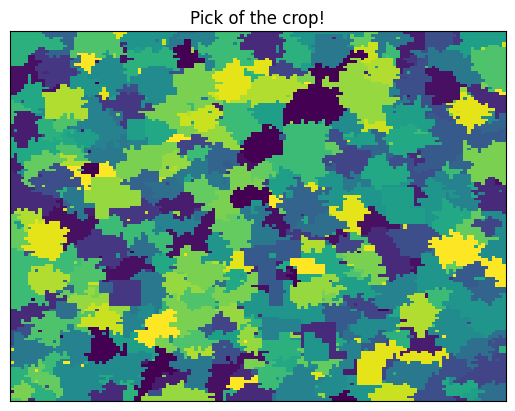

In [164]:
# great that works let's try the real one
grid = parse_from_file('day_12.txt', parser)
fig, ax = plt.subplots()
ax.set_title('Pick of the crop!')
plot_regions(grid, ax)

In [165]:
cost = get_regions(grid)

INFO:day 12:graphed 19600 tiles
INFO:day 12:running until total_to_check=19600


In [168]:
markdown(f'the total number of fences required is: {cost}')

the total number of fences required is: 1461752